###### Inference and Validation

In [1]:
import torch
from torchvision import datasets, transforms
#Define transform to normalize data
transform=transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
#Download training data
trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
#Load training data
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
#Download test data
testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False,transform=transform)
#Load test data
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [2]:
#Import libraries
from torch import nn, optim
import torch.nn.functional as F
#Define network architecture
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Define input layer
        self.fc1 = nn.Linear(784, 256)
        #Define hidden layers
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        #Define output layer
        self.fc4 = nn.Linear(64, 10) 
        #Define forward function
    def forward(self,x):
            #flattened input tensor
            x=x.view(x.shape[0],-1)          
            x=F.relu(self.fc1(x))
            x=F.relu(self.fc2(x))
            x=F.relu(self.fc3(x))
            x=F.log_softmax(self.fc4(x),dim=1)            
            return x

In [3]:
model=Network()
images,labels=next(iter(testloader))
#Get class probabilities
ps=torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [4]:
top_p,top_class=ps.topk(1,dim=1)
print(top_class[:10,:])

tensor([[7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7]])


In [5]:
equals = top_class == labels.view(*top_class.shape)

In [7]:
equals

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False

In [10]:
accuracy=torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy:{accuracy.item()*100}%')

Accuracy:7.8125%


>**Exercise:** Implement the validation loop below and print out the total accuracy after the loop. You can largely copy and paste the code from above, but I suggest typing it in because writing it out yourself is essential for building the skill. In general you'll always learn more by typing it rather than copy-pasting. You should be able to get an accuracy above 80%.

In [11]:
#Create the network, define the criterion and optimizer
model=Network()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(), lr=0.003)
#Train the network
epochs = 30
steps = 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #Training pass
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #Backword pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.515..  Test Loss: 0.473..  Test Accuracy: 0.829
Epoch: 2/30..  Training Loss: 0.393..  Test Loss: 0.400..  Test Accuracy: 0.856
Epoch: 3/30..  Training Loss: 0.354..  Test Loss: 0.420..  Test Accuracy: 0.845
Epoch: 4/30..  Training Loss: 0.333..  Test Loss: 0.389..  Test Accuracy: 0.859
Epoch: 5/30..  Training Loss: 0.317..  Test Loss: 0.363..  Test Accuracy: 0.871
Epoch: 6/30..  Training Loss: 0.301..  Test Loss: 0.378..  Test Accuracy: 0.868
Epoch: 7/30..  Training Loss: 0.291..  Test Loss: 0.366..  Test Accuracy: 0.873
Epoch: 8/30..  Training Loss: 0.282..  Test Loss: 0.360..  Test Accuracy: 0.874
Epoch: 9/30..  Training Loss: 0.274..  Test Loss: 0.396..  Test Accuracy: 0.870
Epoch: 10/30..  Training Loss: 0.268..  Test Loss: 0.368..  Test Accuracy: 0.877
Epoch: 11/30..  Training Loss: 0.260..  Test Loss: 0.375..  Test Accuracy: 0.874
Epoch: 12/30..  Training Loss: 0.254..  Test Loss: 0.371..  Test Accuracy: 0.875
Epoch: 13/30..  Training Loss: 0.251.

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

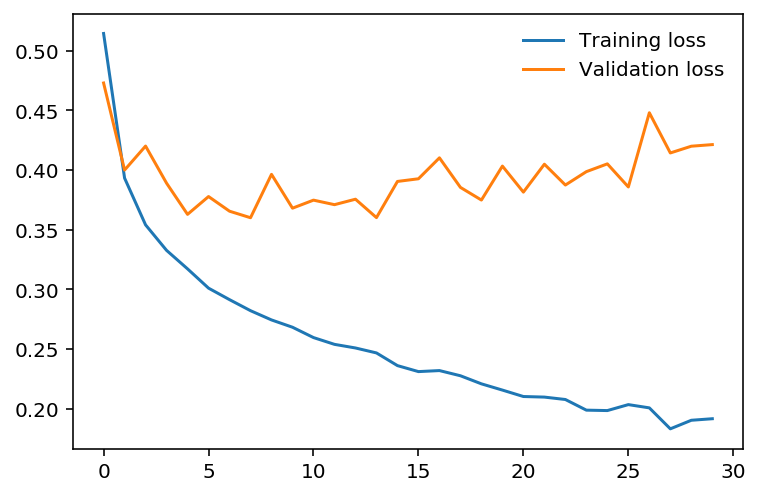

In [13]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

###### Overfitting

> **Exercise:** Add dropout to your model and train it on Fashion-MNIST again. See if you can get a lower validation loss or higher accuracy.

In [14]:
#Define network architecture
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Define input layer
        self.fc1 = nn.Linear(784, 256)
        #Define hidden layers
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        #Define output layer
        self.fc4 = nn.Linear(64, 10) 
        #Dropout model with 0.2 drop probability
        self.dropout=nn.Dropout(p=0.2)
        #Define forward function
    def forward(self,x):
            #flattened input tensor
            x=x.view(x.shape[0],-1)          
            x=self.dropout(F.relu(self.fc1(x)))
            x=self.dropout(F.relu(self.fc2(x)))
            x=self.dropout(F.relu(self.fc3(x)))
            x=F.log_softmax(self.fc4(x),dim=1)            
            return x

In [16]:
#Create the network, define the criterion and optimizer
model=Network()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(), lr=0.003)
#Train the network
epochs = 30
steps = 0
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #Training pass
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #Backword pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.604..  Test Loss: 0.507..  Test Accuracy: 0.816
Epoch: 2/30..  Training Loss: 0.480..  Test Loss: 0.441..  Test Accuracy: 0.838
Epoch: 3/30..  Training Loss: 0.453..  Test Loss: 0.411..  Test Accuracy: 0.851
Epoch: 4/30..  Training Loss: 0.435..  Test Loss: 0.424..  Test Accuracy: 0.845
Epoch: 5/30..  Training Loss: 0.421..  Test Loss: 0.421..  Test Accuracy: 0.851
Epoch: 6/30..  Training Loss: 0.412..  Test Loss: 0.420..  Test Accuracy: 0.856
Epoch: 7/30..  Training Loss: 0.410..  Test Loss: 0.395..  Test Accuracy: 0.852
Epoch: 8/30..  Training Loss: 0.398..  Test Loss: 0.408..  Test Accuracy: 0.859
Epoch: 9/30..  Training Loss: 0.395..  Test Loss: 0.397..  Test Accuracy: 0.860
Epoch: 10/30..  Training Loss: 0.391..  Test Loss: 0.389..  Test Accuracy: 0.862
Epoch: 11/30..  Training Loss: 0.388..  Test Loss: 0.393..  Test Accuracy: 0.859
Epoch: 12/30..  Training Loss: 0.385..  Test Loss: 0.387..  Test Accuracy: 0.865
Epoch: 13/30..  Training Loss: 0.380.

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

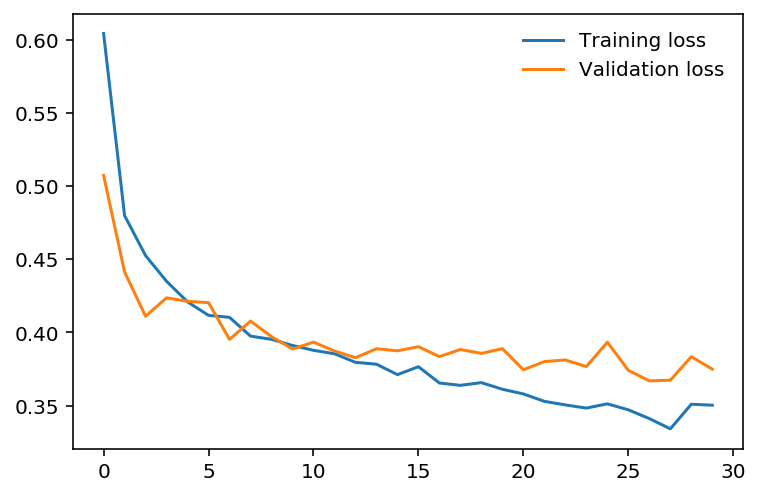

In [18]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

###### Inference

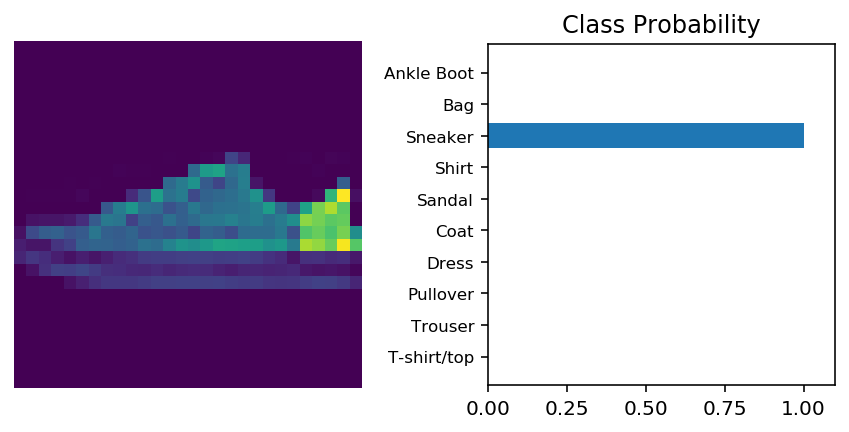

In [19]:
#Import helper module
import helper
#Test network!
model.eval()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
#Convert 2D image to 1D vector
img = img.view(1, 784)
#Calculate class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)
# Plot image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')